In [70]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [71]:
raw_data=pd.read_csv('Downloads/MobilePriceRange.csv')

In [72]:
raw_data.head(17)

,battery_power,int_memory,fc,n_cores,ram,talk_time,dual_sim,wifi,pc,mobile_wt,price_range
0,842,7,1,2,2549,19,0,1,2,188,Medium
1,1021,53,0,3,2631,7,1,0,6,136,High
2,563,41,2,5,2603,9,1,0,6,145,High
3,615,10,0,6,2769,11,0,0,9,131,High
4,1821,44,13,2,1411,15,0,0,14,141,Medium
5,1859,22,3,1,1067,10,1,0,7,164,Medium
6,1821,10,4,8,3220,18,0,1,10,139,VeryHigh
7,1954,24,0,4,700,5,1,1,0,187,Low
8,1445,53,0,7,1099,20,0,0,14,174,Low
9,509,9,2,5,513,12,1,0,15,93,Low


# Check missing values

In [73]:
raw_data.isnull().sum()

battery_power    0
int_memory       0
fc               0
n_cores          0
ram              0
talk_time        0
dual_sim         0
wifi             0
pc               0
mobile_wt        0
price_range      0
dtype: int64

In [74]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   battery_power  2000 non-null   int64 
 1   int_memory     2000 non-null   int64 
 2   fc             2000 non-null   int64 
 3   n_cores        2000 non-null   int64 
 4   ram            2000 non-null   int64 
 5   talk_time      2000 non-null   int64 
 6   dual_sim       2000 non-null   int64 
 7   wifi           2000 non-null   int64 
 8   pc             2000 non-null   int64 
 9   mobile_wt      2000 non-null   int64 
 10  price_range    2000 non-null   object
dtypes: int64(10), object(1)
memory usage: 172.0+ KB


# Encoding

In [75]:
price_range_encoding = {'Low': 0,'Medium': 1,'High': 2,'VeryHigh': 3}


raw_data['EncodedPrice'] = raw_data['price_range'].map(price_range_encoding)

raw_data.drop('price_range',axis=1,inplace=True)
raw_data = raw_data.rename(columns={'EncodedPrice': 'price_range'})

raw_data.head(10)

,battery_power,int_memory,fc,n_cores,ram,talk_time,dual_sim,wifi,pc,mobile_wt,price_range
0,842,7,1,2,2549,19,0,1,2,188,1
1,1021,53,0,3,2631,7,1,0,6,136,2
2,563,41,2,5,2603,9,1,0,6,145,2
3,615,10,0,6,2769,11,0,0,9,131,2
4,1821,44,13,2,1411,15,0,0,14,141,1
5,1859,22,3,1,1067,10,1,0,7,164,1
6,1821,10,4,8,3220,18,0,1,10,139,3
7,1954,24,0,4,700,5,1,1,0,187,0
8,1445,53,0,7,1099,20,0,0,14,174,0
9,509,9,2,5,513,12,1,0,15,93,0


In [76]:
raw_data.describe()

,battery_power,int_memory,fc,n_cores,ram,talk_time,dual_sim,wifi,pc,mobile_wt,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,32.046500,4.309500,4.520500,2124.213000,11.011000,0.509500,0.507000,9.916500,140.249000,1.500000
std,439.418206,18.145715,4.341444,2.287837,1084.732044,5.463955,0.500035,0.500076,6.064315,35.399655,1.118314
min,501.000000,2.000000,0.000000,1.000000,256.000000,2.000000,0.000000,0.000000,0.000000,80.000000,0.000000
25%,851.750000,16.000000,1.000000,3.000000,1207.500000,6.000000,0.000000,0.000000,5.000000,109.000000,0.750000
50%,1226.000000,32.000000,3.000000,4.000000,2146.500000,11.000000,1.000000,1.000000,10.000000,141.000000,1.500000
75%,1615.250000,48.000000,7.000000,7.000000,3064.500000,16.000000,1.000000,1.000000,15.000000,170.000000,2.250000
max,1998.000000,64.000000,19.000000,8.000000,3998.000000,20.000000,1.000000,1.000000,20.000000,200.000000,3.000000


# Data Distrubution

<AxesSubplot:xlabel='price_range', ylabel='count'>

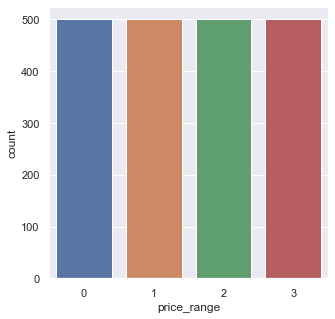

In [77]:
sns.countplot(x='price_range', data=raw_data)

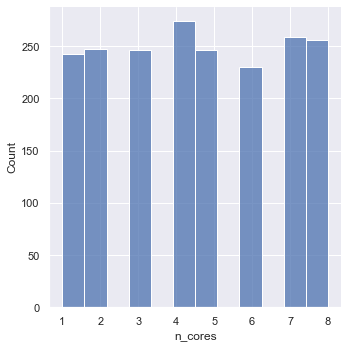

In [78]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=raw_data["n_cores"])
plt.show()

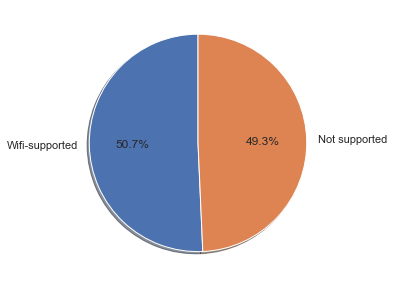

In [79]:
labels = ["Wifi-supported","Not supported"]
values=raw_data['wifi'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

# Data Visulization

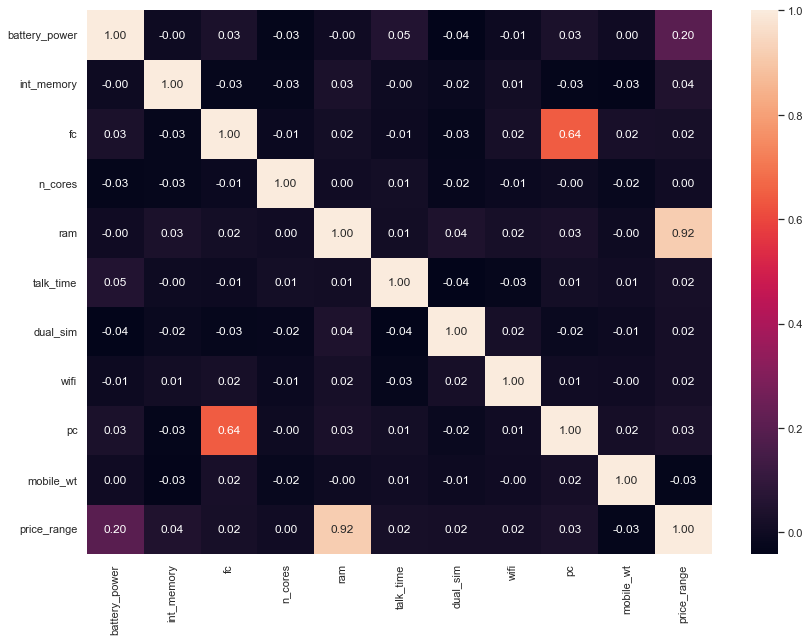

In [80]:
plt.figure(figsize=(14,10))
sns.heatmap(raw_data.corr(), annot=True, fmt=".2f");

# Price range according to the no of cores and battery power

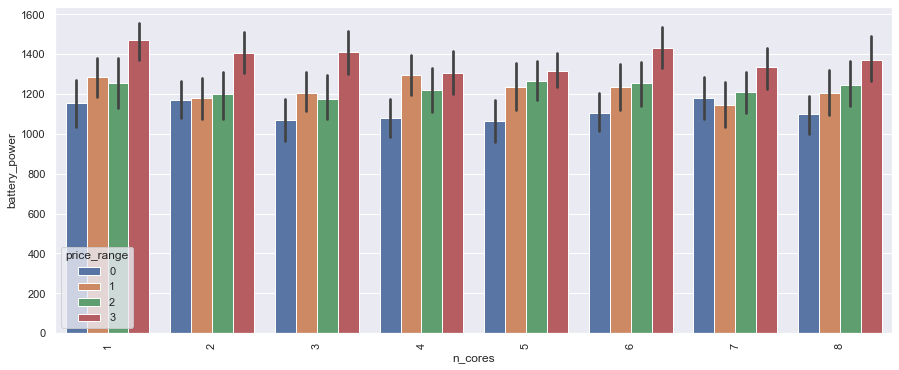

In [81]:
plt.figure(figsize=(15,6));
sns.barplot( x= "n_cores", y = "battery_power" ,hue="price_range", data=raw_data)
plt.xticks(rotation=90);

# RAM vs Price Range

<AxesSubplot:xlabel='price_range', ylabel='ram'>

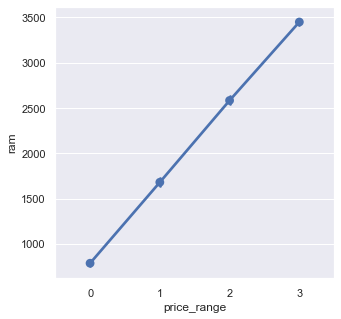

In [82]:
sns.pointplot(y="ram", x="price_range", data=raw_data)

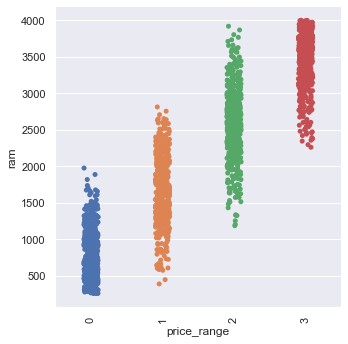

In [83]:
sns.catplot(x="price_range",y="ram",data=raw_data)
plt.xticks(rotation=90);

# Split tha data

In [84]:
X = raw_data.drop('price_range',axis=1)
y = raw_data['price_range']

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=120)

In [86]:
scaler=StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.fit_transform(X_test))

In [87]:
X_train

,0,1,2,3,4,5,6,7,8,9
0,-1.405466,-1.611601,-0.760358,1.521567,1.305388,-1.468024,-1.016808,0.991150,-0.482307,-1.077406
1,-0.534595,-0.616824,0.162064,1.521567,-0.762504,0.177788,0.983470,-1.008929,0.342463,1.265736
2,-0.582220,-0.229966,2.006909,-0.222905,-0.903076,1.274996,-1.016808,-1.008929,1.662095,1.181044
3,1.445278,-0.782620,-0.068541,-0.659023,1.116725,-0.736552,-1.016808,-1.008929,-0.812215,-0.061104
4,-1.437217,0.654281,2.468120,-1.531259,0.421262,0.726392,-1.016808,0.991150,1.002279,-0.653947
...,...,...,...,...,...,...,...,...,...,...
1795,1.107361,1.538528,3.159937,-0.222905,-0.837414,1.640732,0.983470,-1.008929,1.662095,0.870507
1796,-1.069818,-0.395762,-0.299147,-0.222905,-1.253582,1.640732,-1.016808,-1.008929,-0.647261,-1.529096
1797,-1.210427,-1.058947,1.545698,1.521567,-1.533801,-1.102288,-1.016808,0.991150,0.837325,-1.670249
1798,1.211685,-0.948416,-0.990963,-0.222905,-0.530374,-0.187948,0.983470,-1.008929,-0.482307,-1.133867


In [88]:
X_test

,0,1,2,3,4,5,6,7,8,9
0,1.870643,-0.864546,-0.324631,-1.613985,-0.226259,1.135473,-1.040833,0.941697,0.519209,1.139483
1,0.164076,1.456746,-1.010471,0.176844,1.066343,0.950542,-1.040833,0.941697,-1.458731,-1.054570
2,-0.827673,-0.540645,-0.324631,0.176844,-1.469423,-0.159040,-1.040833,0.941697,-0.469761,1.680872
3,-1.516453,1.402762,0.361209,-0.718570,0.048801,-0.713831,0.960769,0.941697,0.354381,-1.709937
4,0.980672,-1.188447,-0.324631,-1.613985,0.750833,-1.453553,-1.040833,-1.061913,0.519209,-0.684146
...,...,...,...,...,...,...,...,...,...,...
195,0.748711,0.916910,0.361209,0.176844,0.637573,0.025890,-1.040833,0.941697,0.684038,0.056703
196,-1.213484,-1.566332,-1.010471,-0.718570,-1.547626,-0.528901,-1.040833,0.941697,-1.293902,-1.481983
197,0.462311,0.808943,-1.010471,1.072259,0.248354,0.765612,0.960769,0.941697,-1.458731,-0.085768
198,0.968837,1.780647,0.589823,-0.270863,-1.053237,-0.343971,-1.040833,-1.061913,0.354381,1.139483


#  Alogorithms For Regression

# Decision Tree 

In [89]:
from sklearn.tree import DecisionTreeRegressor

In [141]:
model=DecisionTreeRegressor(max_depth=2)

In [142]:
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2)

In [143]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

[Text(0.5, 0.8333333333333334, 'X[4] <= 0.102\nsquared_error = 1.246\nsamples = 1800\nvalue = 1.502'),
 Text(0.25, 0.5, 'X[4] <= -0.943\nsquared_error = 0.451\nsamples = 942\nvalue = 0.635'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.097\nsamples = 403\nvalue = 0.109'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.354\nsamples = 539\nvalue = 1.028'),
 Text(0.75, 0.5, 'X[4] <= 0.821\nsquared_error = 0.385\nsamples = 858\nvalue = 2.455'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.311\nsamples = 389\nvalue = 2.008'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.144\nsamples = 469\nvalue = 2.825')]

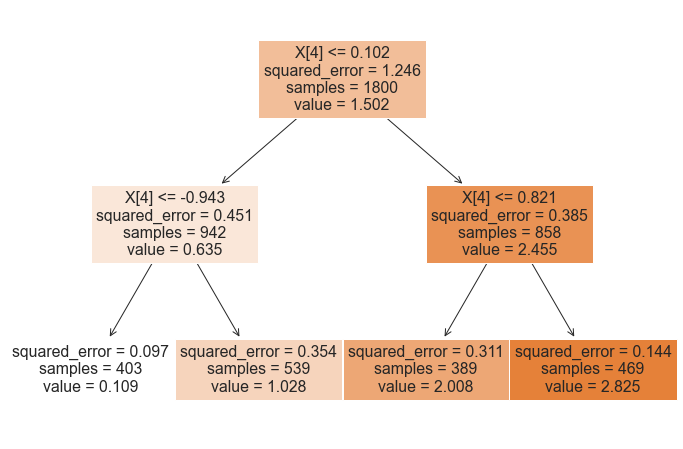

In [144]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(model, filled=True,)

In [145]:
y_pre=model.predict(X_test)

In [146]:
y_pre

array([1.02782931, 2.82515991, 0.10918114, 1.02782931, 2.00771208,
       1.02782931, 2.00771208, 2.00771208, 2.82515991, 1.02782931,
       0.10918114, 2.82515991, 2.82515991, 2.82515991, 1.02782931,
       2.82515991, 1.02782931, 1.02782931, 1.02782931, 2.82515991,
       0.10918114, 0.10918114, 1.02782931, 0.10918114, 1.02782931,
       2.82515991, 2.82515991, 2.82515991, 0.10918114, 1.02782931,
       0.10918114, 1.02782931, 0.10918114, 0.10918114, 2.00771208,
       1.02782931, 0.10918114, 2.82515991, 0.10918114, 1.02782931,
       2.82515991, 1.02782931, 2.82515991, 2.00771208, 2.82515991,
       1.02782931, 0.10918114, 2.00771208, 2.82515991, 1.02782931,
       2.00771208, 2.82515991, 1.02782931, 2.82515991, 2.00771208,
       2.82515991, 1.02782931, 0.10918114, 2.00771208, 1.02782931,
       2.00771208, 2.00771208, 2.82515991, 1.02782931, 1.02782931,
       2.00771208, 0.10918114, 0.10918114, 0.10918114, 2.82515991,
       2.82515991, 2.00771208, 2.82515991, 1.02782931, 0.10918

In [147]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pre)
mse = mean_squared_error(y_test, y_pre)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pre)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.1741114784141172
Root Mean Squared Error: 0.41726667541767243
Mean Absolute Error: 0.23783900330329483
R-squared: 0.8649879975076635


# Linear Reagression

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import r2_score

In [99]:
lr=LinearRegression()
mse=cross_val_score(lr,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
np.mean(mse)

-0.1508100034347096

In [100]:
lr.fit(X_train,y_train)

LinearRegression()

In [101]:
lr.score(X_train,y_train)

0.8810239443918261

In [102]:
y_pre=lr.predict(X_test)

In [103]:
s=r2_score(y_pre,y_test)

In [104]:
s

0.8752720053418049

# Ridge regression

In [105]:
from sklearn.linear_model import Ridge

In [106]:
ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(X_train, y_train)

ridge_prediction = ridge_model.predict(X_test)

In [107]:
from sklearn.metrics import mean_squared_error

ridge_mse = mean_squared_error(y_test, ridge_prediction)
print('Mean Squared Error for Ridge:', ridge_mse)

Mean Squared Error for Ridge: 0.13772840985380097


# Lasso Regression

In [108]:
from sklearn.linear_model import Lasso

In [109]:
lasso_model = Lasso(alpha=1.0)  
lasso_model.fit(X_train, y_train)
lasso_prediction = lasso_model.predict(X_test)

In [110]:
lasso_mse = mean_squared_error(y_test, lasso_prediction)
print('Mean Squared Error for Lasso:', lasso_mse)

Mean Squared Error for Lasso: 1.2470374726689275


# ElasticNet Regression

In [111]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [112]:
y_pre=model.predict(X_test)

In [113]:
mse = mean_squared_error(y_test, y_pre)
r2 = r2_score(y_test, y_pre)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.1741114784141172
R-squared: 0.8649879975076635


# Random Forest Regression

In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [115]:
RF=RandomForestRegressor()

In [138]:
y_pre=model.predict(X_test)
y_pre

array([ 1.72688687e+00,  2.92472553e+00, -1.01369217e-01,  1.02438712e+00,
        2.73931623e+00,  1.11260140e+00,  2.28811121e+00,  2.35071659e+00,
        2.88682413e+00,  9.48415637e-01,  3.81916046e-01,  2.02617431e+00,
        3.04796457e+00,  2.99574852e+00,  1.22157216e+00,  3.27934813e+00,
        1.00147867e+00,  1.03027666e+00,  6.30678475e-01,  2.97920609e+00,
        1.35483906e-01,  2.52313316e-01,  1.11737359e+00,  2.01651696e-02,
        1.13881958e+00,  3.01405668e+00,  2.12967873e+00,  2.95628953e+00,
        2.45615486e-02,  5.14658570e-01,  1.37207195e-01,  1.11909115e+00,
       -9.60853398e-02, -6.89232424e-02,  1.89793956e+00,  8.70655656e-01,
        1.66055962e-01,  2.42891741e+00,  4.58736233e-02,  1.05464292e+00,
        2.83888793e+00,  2.91031855e-03,  2.38437629e+00,  2.17895103e+00,
        3.09794140e+00,  2.49179542e-01, -5.70532233e-02,  2.12102056e+00,
        2.55074906e+00,  9.06942487e-01,  1.77028775e+00,  2.78256488e+00,
        1.21379864e+00,  

In [139]:
mse = mean_squared_error(y_test,y_pre)
r2 = r2_score(y_test,y_pre)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.14934992393403324
R-squared: 0.8841889547657931


# Gradient Boosting Regression

In [118]:
import xgboost as xgb

In [119]:
from sklearn.metrics import mean_squared_error

In [120]:
model=xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [121]:
y_pre=model.predict(X_test)

In [122]:
mse=mean_squared_error(y_test, y_pre)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.14934992393403324


# K-Nearest Neighbors (KNN) Regression

In [123]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [124]:
regressor = KNeighborsRegressor(n_neighbors=4)  
regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [125]:
y_pre=regressor.predict(X_test)

In [126]:
mse = mean_squared_error(y_test, y_pre)
r2 = r2_score(y_test, y_pre)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.3084375
R-squared: 0.7608270006203475


# Support Vector Regression (SVR)

In [127]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [128]:
regressor=SVR(kernel='rbf', C=1.0, gamma='scale')
regressor.fit(X_train, y_train)

SVR()

In [129]:
y_pre=regressor.predict(X_test)

In [130]:
mse = mean_squared_error(y_test, y_pre)
r2 = r2_score(y_test, y_pre)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.14970180530668523
R-squared: 0.8839160938999029


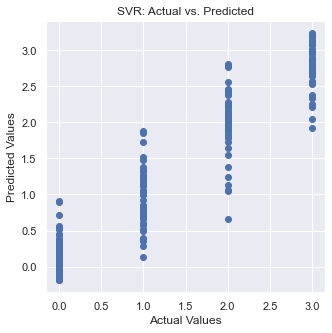

In [131]:
import matplotlib.pyplot as plt

# Create a scatter plot of the actual vs. predicted values

plt.scatter(y_test, y_pre)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("SVR: Actual vs. Predicted")
plt.show()


# Bayesian Regression

In [132]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score

In [133]:
bayesian_reg = BayesianRidge()
bayesian_reg.fit(X_train, y_train)

BayesianRidge()

In [134]:
y_pre= bayesian_reg.predict(X_test)

In [135]:
mse = mean_squared_error(y_test, y_pre)
r2 = r2_score(y_test, y_pre)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.13773862133249884
R-squared: 0.8931927564109035


In [136]:
# pip install dash

In [137]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd 

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Machine Learning Algorithm Accuracy Dashboard", style={'color': ' cyan'}),
    
    dcc.Dropdown(
        id='algorithm-selector',
        options=[
             {'label': 'Random Forest', 'value': 'RFR'},
            {'label': 'Support Vector Regression', 'value': 'SVR'},
            {'label': 'Decision Tree Regression', 'value': 'DTR'},
            {'label': 'Linear Regression', 'value': 'LR'},
            {'label': 'Bayesian Regression ', 'value': 'BSR'},
            {'label': 'Ridge Regression', 'value': 'Ridge_r'},
            {'label': 'Lasso Regression', 'value': 'Lasso_r'},
            {'label': 'K-Nearest Neighbour Regression', 'value': 'KNN'},
            {'label': 'Gradient Boosting Regression', 'value': 'GBR'},
            {'label': 'ElasticNet Regression', 'value': 'ENR'},
        ],
        multi=True, 
        value=['random_forest'],  
        style={'background-color': 'lightgray', 'color': 'black'},
    ),
    
    dcc.Graph(
        id='accuracy-graph',
        style={'border': '1px solid gray', 'margin-top': '20px'},
    ),
])


accuracies = {
    'RFR':{'accuracy': 0.864, 'color': 'red'},
    'SVR':  {'accuracy': 0.901, 'color': 'green'},
    'DTR':  {'accuracy':  0.864, 'color': 'Yellow'},
    'LR':  {'accuracy': 0.912, 'color': 'Purple'},
    'BSR' : { 'accuracy': 0.923, 'color': 'Brown'},
    'Ridge_r':  {'accuracy': 0.099, 'color': 'pink'},
    'Lasso_r':  {'accuracy':1.247, 'color': 'blue'},
    'KNN': {'accuracy': 0.646, 'color': 'Orange'},
    'GBR' :{ 'accuracy': 0.079, 'color': 'black'},
    'ENR' :{'accuracy':0.864, 'color': 'Indigo'},
}


@app.callback(
    Output('accuracy-graph', 'figure'),
    Input('algorithm-selector', 'value')
)
def update_accuracy_graph(selected_algorithms):
    data = []
    colors = []
    for algorithm in selected_algorithms:
        accuracy_data = accuracies.get(algorithm, {'accuracy': 0.0, 'color': 'gray'})
        accuracy = accuracy_data['accuracy']
        color = accuracy_data['color']
        data.append({'Algorithm': algorithm, 'Accuracy': accuracy})
        colors.append(color)
    
    df = pd.DataFrame(data)
    fig = {
        'data': [
            {
                'x': df['Algorithm'],
                'y': df['Accuracy'],
                'type': 'bar',
                'name': 'Accuracy',
                'marker': {'color': colors}  # Assign individual colors
            },
        ],
        'layout': {
            'title': 'Algorithm Accuracy Comparison',
            'bargap': 0.3, 
            'bargroupgap': 0.2 
        }
    }
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)